Mount Google Drive

In [ ]:
from google.colab import auth
from google.colab import drive
import pandas as pd
import gspread
from google.auth import default

In [ ]:
print("="*70)
print("CONNECTING TO GOOGLE SHEETS")
print("="*70)

CONNECTING TO GOOGLE SHEETS


In [ ]:
#Authentication to google
auth.authenticate_user()
creds, _ = default()

In [ ]:
#Access to google sheets
gc = gspread.authorize(creds)

print("\n Authentication successful!")
print("Ready to connect to Google Sheets")


 Authentication successful!
Ready to connect to Google Sheets


2. Connect to Google sheet

In [ ]:
SHEET_URL= 'https://docs.google.com/spreadsheets/d/1ZoZ7ZQXVLnk5JokphSQK0tqIT9IshB2NCg9_UCiAw6s/edit?gid=1620608954#gid=1620608954'

In [ ]:
print("\n" + "="*70)
print("LOADING DATA FROM GOOGLE SHEETS")
print("="*70)


LOADING DATA FROM GOOGLE SHEETS


In [ ]:
try:
  spreadsheet= gc.open_by_url(SHEET_URL)
  worksheet = spreadsheet.get_worksheet(0)

  data= worksheet.get_all_values()
  headers= data[0]
  rows= data[1:]

  df=pd.DataFrame(rows, columns=headers)

  print(f"\n Succesfully connected to Google Sheet!")
  print(f"  Sheet name: {spreadsheet.title}")
  print(f"  Worksheet name: {worksheet.title}")
  print(f"  Total rows: {len(df)}")
  print(f"  Total columns: {len(df.columns)}")

except Exception as e:
  print(f"\n Error connecting to sheet: {e}")
  print("\n TROUBLESHOOTING:")
  print("1. Make sure you pasted the correct URL")
  print("2. Check that the sheet is shared with your Google account")
  print("3. Try Method 2 below if URL method doesn't work")


 Succesfully connected to Google Sheet!
  Sheet name: Project Survey (Responses)
  Worksheet name: Form Responses 1
  Total rows: 39
  Total columns: 24


3. Data Type Conversion

In [ ]:
print("\n" + "="*70)
print("CONVERTING DATA TYPES")
print("="*70)


CONVERTING DATA TYPES


In [ ]:
print("\nOriginal data types (all strings):")
print(df.dtypes.head())

timestamp_cols = [col for col in df.columns if 'timestamp' in col.lower()]
if timestamp_cols:
    df[timestamp_cols[0]] = pd.to_datetime(df[timestamp_cols[0]])
    print(f"\n✓ Converted {timestamp_cols[0]} to datetime")


Original data types (all strings):
Timestamp                                       object
Email Address                                   object
What is your age range?                         object
What is your gender?                            object
Educational background? (currently pursuing)    object
dtype: object

✓ Converted Timestamp to datetime


In [ ]:
#converting numeric columns
numeric_columns = []

for col in numeric_columns:
  if col in df.columns:
    df[col]= pd.to_numeric(df[col], errors='coerce')
    print(f"Converted {col} to numeric")

print("\n Data type conversion complete!")


 Data type conversion complete!


4. Initial Data Preview

In [ ]:
print("\n" + "="*70)
print("Data Preview")
print("="*70)


Data Preview


In [ ]:
print(f"\n Dataset Overview:")
print(f"  Total responses: {len(df)}")
print(f"  Total questions: {len(df.columns)}")


 Dataset Overview:
  Total responses: 39
  Total questions: 24


In [ ]:
print(f"\n First 3 rows:")
print("-"*70)
display(df.head(3))


 First 3 rows:
----------------------------------------------------------------------


,Timestamp,Email Address,What is your age range?,What is your gender?,Educational background? (currently pursuing),What is your current level of study in university?,"In the past 6 months, how often have you read the privacy policy before installing a new app or signing up for a service?","How often do you review app permissions (e.g., camera, location) for the apps installed on your phone?",Have you ever uninstalled an app because it asked for too many permissions or raised privacy concerns?,Do you use different passwords for different apps and websites to secure your personal data?,...,Do you think companies should use your search history to serve targeted ads while you study or browse online?,"Who should be held accountable if AI algorithms make incorrect decisions about students (e.g., in exam proctoring)? (Select all that apply)",Would you be comfortable if an AI tracked your online habits to offer mental health advice or study recommendations?,How much do you trust AI to recommend music?,How much do you trust AI to monitor exams fairly?,True/False Knowledge Check: [Incognito mode hides your browsing history from your Internet Service Provider (ISP).],"True/False Knowledge Check: [Data described as ""anonymous"" in privacy policies is impossible to trace back to you.]",True/False Knowledge Check: [Social media platforms are allowed to analyze private messages to target ads.],Do you believe universities should actively educate students about data privacy and AI ethics as part of the curriculum?,Score
0,2025-09-11 20:41:26,ishita2876shrma@gmail.com,22-25,Female,Bachelor of Technology (B.Tech) / Bachelor of ...,4th year,Rarely,Ocassionally,Yes,Yes,...,Only with explicit consent,"The company that built the AI, The student who...","Maybe, only with consent",3,3,FALSE,FALSE,TRUE,Strongly Agree,
1,2025-09-11 20:43:11,balodijatin@gmail.com,18-21,Male,Bachelor of Technology (B.Tech) / Bachelor of ...,4th year,Often,Ocassionally,Yes,Yes,...,Only with explicit consent,"The company that built the AI, The student who...","Maybe, only with consent",4,2,FALSE,FALSE,TRUE,Strongly Agree,
2,2025-09-12 00:36:51,salmanialisha039@gmail.com,18-21,Female,Bachelor of Technology (B.Tech) / Bachelor of ...,4th year,Sometimes,Ocassionally,Yes,Yes,...,"No, it’s unethical",The student who relied on it,"No, too invasive",5,2,FALSE,TRUE,TRUE,Strongly Agree,


In [ ]:
print(f"\n All column names:")
print("-"*70)
for i, col in enumerate(df.columns, 1):
  print(f"{i:2d}. {col}")


 All column names:
----------------------------------------------------------------------
 1. Timestamp
 2. Email Address
 3. What is your age range?
 4. What is your gender?
 5. Educational background? (currently pursuing)
 6. What is your current level of study in university?
 7. In the past 6 months, how often have you read the privacy policy before installing a new app or signing up for a service? 
 8. How often do you review app permissions (e.g., camera, location) for the apps installed on your phone? 
 9. Have you ever uninstalled an app because it asked for too many permissions or raised privacy concerns?  
10. Do you use different passwords for different apps and websites to secure your personal data?  
11. When a social media app asks for microphone or camera access, what do you usually do?  
12. How frequently do you review the privacy settings of your main social media account (e.g., Instagram, Facebook, X)?  
13. Do you think apps/services clearly explain why they collect

In [ ]:
print(f"\n Data Types:")
print("-"*70)
print(df.dtypes)


 Data Types:
----------------------------------------------------------------------
Timestamp                                                                                                                                        datetime64[ns]
Email Address                                                                                                                                            object
What is your age range?                                                                                                                                  object
What is your gender?                                                                                                                                     object
Educational background? (currently pursuing)                                                                                                             object
What is your current level of study in university?                                                                 

5. Save a local copy

In [ ]:
print("\n" + "-"*70)
print("SAVING LOCAL BACKUP")
print("="*70)


----------------------------------------------------------------------
SAVING LOCAL BACKUP


In [ ]:
#csv backup
backup_filename = 'survey_data_backup.csv'
df.to_csv(backup_filename, index=False)
print(f"Backup saved as: {backup_filename}")

Backup saved as: survey_data_backup.csv


In [ ]:
#optional: for downloading to computer
from google.colab import files
download_backup= False #change to True to download

if download_backup:
  files.downoad(backup_filename)
  print("Downloaded to you computer")

6. Refresh Data Function

In [ ]:
print("\n" + "="*70)
print("REFRESH FUNCTION CREATED")
print("="*70)


REFRESH FUNCTION CREATED


In [ ]:
def refresh_data():
  """
  Call this function anytime to get the latest data from Google Sheets
  """
  try:
    worksheet = gc.open_by_url(SHEET_URL).get_worksheet(0)
    data= worksheet.get_all_values()
    headers = data[1:]
    rows = data[1:]
    df_new = pd.DataFrame(rows, columns=headers)

    #Apply same type conversion
    if timestamps_cols:
      df_new[timestamp_cols[0]] = pd.to_datetime(df_new[timestamp_cols[0]])
    for col in numeric_columns:
      if col in df_new.columns:
        df_new[col]= pd.to_numeric(df_new[col], errors='coerce')

    print(f"Data refreshed!")
    print(f"Total responses: {len(df_new)}")
    print(f"New responses: {len(df_new) - len(df)}")
    return df_new

  except Exception as e:
    print(f"Error refreshing data: {e}")
    return None

print("Use refresh_data() to get latest responses anytime!")

print("\n" + "="*70)
print("SETUP COMPLETE!")
print("="*70)

print("""
✅ YOU'RE NOW CONNECTED TO LIVE DATA!

📊 What you have:
   - Live connection to your Google Form responses
   - Data loaded as DataFrame 'df'
   - Refresh function ready to use

🔄 To get latest data anytime:
   df = refresh_data()

💾 Your data is also backed up locally as: survey_data_backup.csv

🎯 NEXT STEPS:
   1. Verify your data looks correct in the preview above
   2. Customize the numeric_columns list for your survey
   3. Proceed with data cleaning and analysis
   4. Use refresh_data() whenever you collect more responses!
""")

Use refresh_data() to get latest responses anytime!

SETUP COMPLETE!

✅ YOU'RE NOW CONNECTED TO LIVE DATA!

📊 What you have:
   - Live connection to your Google Form responses
   - Data loaded as DataFrame 'df'
   - Refresh function ready to use

🔄 To get latest data anytime:
   df = refresh_data()

💾 Your data is also backed up locally as: survey_data_backup.csv

🎯 NEXT STEPS:
   1. Verify your data looks correct in the preview above
   2. Customize the numeric_columns list for your survey
   3. Proceed with data cleaning and analysis
   4. Use refresh_data() whenever you collect more responses!



Digital Responsibilty index - Complete analysis workflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#set visualization style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] =100

Phase 1: Data Inspection & Understanding

In [ ]:
print("\n" + "="*70)
print("PHASE 1: DATA INSPECTION")
print("="*70)

# 1.1 Display all column names with numbering
print("\n📋 YOUR SURVEY QUESTIONS (Column Names):")
print("-"*70)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


PHASE 1: DATA INSPECTION

📋 YOUR SURVEY QUESTIONS (Column Names):
----------------------------------------------------------------------
 1. Timestamp
 2. Email Address
 3. What is your age range?
 4. What is your gender?
 5. Educational background? (currently pursuing)
 6. What is your current level of study in university?
 7. In the past 6 months, how often have you read the privacy policy before installing a new app or signing up for a service? 
 8. How often do you review app permissions (e.g., camera, location) for the apps installed on your phone? 
 9. Have you ever uninstalled an app because it asked for too many permissions or raised privacy concerns?  
10. Do you use different passwords for different apps and websites to secure your personal data?  
11. When a social media app asks for microphone or camera access, what do you usually do?  
12. How frequently do you review the privacy settings of your main social media account (e.g., Instagram, Facebook, X)?  
13. Do you think

In [ ]:
# 1.2 Check data shape
print(f"\n📊 Dataset Shape:")
print(f"   Rows (Responses): {df.shape[0]}")
print(f"   Columns (Questions): {df.shape[1]}")


📊 Dataset Shape:
   Rows (Responses): 39
   Columns (Questions): 24


In [ ]:
# 1.3 Quick preview
print("\n📋 First 3 Responses:")
print("-"*70)
display(df.head(3))


📋 First 3 Responses:
----------------------------------------------------------------------


,Timestamp,Email Address,What is your age range?,What is your gender?,Educational background? (currently pursuing),What is your current level of study in university?,"In the past 6 months, how often have you read the privacy policy before installing a new app or signing up for a service?","How often do you review app permissions (e.g., camera, location) for the apps installed on your phone?",Have you ever uninstalled an app because it asked for too many permissions or raised privacy concerns?,Do you use different passwords for different apps and websites to secure your personal data?,...,Do you think companies should use your search history to serve targeted ads while you study or browse online?,"Who should be held accountable if AI algorithms make incorrect decisions about students (e.g., in exam proctoring)? (Select all that apply)",Would you be comfortable if an AI tracked your online habits to offer mental health advice or study recommendations?,How much do you trust AI to recommend music?,How much do you trust AI to monitor exams fairly?,True/False Knowledge Check: [Incognito mode hides your browsing history from your Internet Service Provider (ISP).],"True/False Knowledge Check: [Data described as ""anonymous"" in privacy policies is impossible to trace back to you.]",True/False Knowledge Check: [Social media platforms are allowed to analyze private messages to target ads.],Do you believe universities should actively educate students about data privacy and AI ethics as part of the curriculum?,Score
0,2025-09-11 20:41:26,ishita2876shrma@gmail.com,22-25,Female,Bachelor of Technology (B.Tech) / Bachelor of ...,4th year,Rarely,Ocassionally,Yes,Yes,...,Only with explicit consent,"The company that built the AI, The student who...","Maybe, only with consent",3,3,FALSE,FALSE,TRUE,Strongly Agree,
1,2025-09-11 20:43:11,balodijatin@gmail.com,18-21,Male,Bachelor of Technology (B.Tech) / Bachelor of ...,4th year,Often,Ocassionally,Yes,Yes,...,Only with explicit consent,"The company that built the AI, The student who...","Maybe, only with consent",4,2,FALSE,FALSE,TRUE,Strongly Agree,
2,2025-09-12 00:36:51,salmanialisha039@gmail.com,18-21,Female,Bachelor of Technology (B.Tech) / Bachelor of ...,4th year,Sometimes,Ocassionally,Yes,Yes,...,"No, it’s unethical",The student who relied on it,"No, too invasive",5,2,FALSE,TRUE,TRUE,Strongly Agree,


In [ ]:
# 1.4 Data types
print("\n📋 Current Data Types:")
print("-"*70)
print(df.dtypes)


📋 Current Data Types:
----------------------------------------------------------------------
Timestamp                                                                                                                                        datetime64[ns]
Email Address                                                                                                                                            object
What is your age range?                                                                                                                                  object
What is your gender?                                                                                                                                     object
Educational background? (currently pursuing)                                                                                                             object
What is your current level of study in university?                                                        

PHASE 2: IDENTIFY AND RENAME COLUMNS

In [ ]:
print("\n" + "="*70)
print("CREATING INTELLIGENT MAPPING")
print("="*70)


CREATING INTELLIGENT MAPPING


In [ ]:
column_mapping = {}

for col in df.columns:
    col_lower = col.lower()

    # Timestamp
    if 'timestamp' in col_lower:
        column_mapping[col] = 'Timestamp'

    # Email
    elif 'email' in col_lower:
        column_mapping[col] = 'Email'

    # Demographics
    elif 'age' in col_lower and 'range' in col_lower:
        column_mapping[col] = 'Age_Range'
    elif 'gender' in col_lower:
        column_mapping[col] = 'Gender'
    elif ('educational' in col_lower or 'academic' in col_lower) and 'background' in col_lower:
        column_mapping[col] = 'Academic_Stream'
    elif 'level of study' in col_lower or 'year' in col_lower:
        column_mapping[col] = 'Year_of_Study'
        # Privacy Questions
    elif 'privacy policy' in col_lower and ('read' in col_lower or 'install' in col_lower):
        column_mapping[col] = 'Privacy_Policy_Reading'
    elif 'app permissions' in col_lower or ('review' in col_lower and 'permissions' in col_lower):
        column_mapping[col] = 'App_Permissions_Review'
    elif 'uninstalled' in col_lower and ('permissions' in col_lower or 'privacy' in col_lower):
        column_mapping[col] = 'Uninstall_Due_Privacy'
    elif 'different passwords' in col_lower:
        column_mapping[col] = 'Different_Passwords'
    elif 'social media' in col_lower and ('microphone' in col_lower or 'camera access' in col_lower):
        column_mapping[col] = 'Social_Media_Permissions'
    elif 'privacy settings' in col_lower and ('review' in col_lower or 'frequently' in col_lower):
        column_mapping[col] = 'Privacy_Settings_Review'
    elif ('clearly explain' in col_lower or 'apps/services' in col_lower) and 'collect' in col_lower:
        column_mapping[col] = 'Data_Collection_Clarity'

    # AI Ethics Questions
    elif 'ai' in col_lower and 'mental health' in col_lower and ('analyze' in col_lower or 'social media' in col_lower):
        column_mapping[col] = 'AI_Mental_Health_Analysis'
    elif 'search history' in col_lower and 'targeted ads' in col_lower:
        column_mapping[col] = 'Targeted_Ads_Opinion'
    elif 'accountable' in col_lower and 'ai' in col_lower and ('incorrect' in col_lower or 'decisions' in col_lower):
        column_mapping[col] = 'AI_Accountability'
    elif 'ai tracked' in col_lower and ('habits' in col_lower or 'mental health advice' in col_lower):
        column_mapping[col] = 'AI_Habit_Tracking_Comfort'

    # AI Trust
    elif 'trust ai' in col_lower and 'music' in col_lower:
        column_mapping[col] = 'Trust_AI_Music'
    elif 'trust ai' in col_lower and ('exam' in col_lower or 'monitor' in col_lower):
        column_mapping[col] = 'Trust_AI_Exam_Proctoring'

    # Knowledge Checks - Mapping using exact original column names
    elif col.strip() == 'True/False Knowledge Check:   [Incognito mode hides your browsing history from your Internet Service Provider (ISP).]' :
        column_mapping[col] = 'Knowledge_Incognito_ISP'
    elif col.strip() == 'True/False Knowledge Check:   [Data described as "anonymous" in privacy policies is impossible to trace back to you.]':
        column_mapping[col] = 'Knowledge_Anonymous_Trace'
    elif col.strip() == 'True/False Knowledge Check:   [Social media platforms are allowed to analyze private messages to target ads.]':
        column_mapping[col] = 'Knowledge_SocialMedia_Messages'


    # Education Need
    elif 'universities' in col_lower and ('educate' in col_lower or 'curriculum' in col_lower):
        column_mapping[col] = 'University_Education_Need'

    # Keep Score column as is
    elif col.strip().lower() == 'score':
        column_mapping[col] = 'Score'
    # Catch any columns not mapped
    elif col not in column_mapping:
         column_mapping[col] = col.replace(' ', '_').replace('.', '').replace('(', '').replace(')', '').replace(',', '').replace('-', '_').replace('?', '').replace(':', '').replace('[', '').replace(']', '').strip()


print(f"\n✅ Intelligent mapping created for {len(column_mapping)} columns")

print("\n📋 MAPPING PREVIEW:")
print("-"*70)
for orig, new in column_mapping.items():
    orig_display = orig[:60] + "..." if len(orig) > 60 else orig
    print(f"  '{orig_display}' → '{new}'")


✅ Intelligent mapping created for 24 columns

📋 MAPPING PREVIEW:
----------------------------------------------------------------------
  'Timestamp' → 'Timestamp'
  'Email Address' → 'Email'
  'What is your age range?' → 'Age_Range'
  'What is your gender?' → 'Gender'
  'Educational background? (currently pursuing)' → 'Academic_Stream'
  'What is your current level of study in university?' → 'Year_of_Study'
  'In the past 6 months, how often have you read the privacy po...' → 'Privacy_Policy_Reading'
  'How often do you review app permissions (e.g., camera, locat...' → 'App_Permissions_Review'
  'Have you ever uninstalled an app because it asked for too ma...' → 'Uninstall_Due_Privacy'
  'Do you use different passwords for different apps and websit...' → 'Different_Passwords'
  'When a social media app asks for microphone or camera access...' → 'Social_Media_Permissions'
  'How frequently do you review the privacy settings of your ma...' → 'Privacy_Settings_Review'
  'Do you think ap

Apply the mapping

In [ ]:
print("\n" + "="*70)
print("APPLYING COLUMN RENAMING")
print("="*70)


APPLYING COLUMN RENAMING


In [ ]:
if len(column_mapping) > 0:
    df = df.rename(columns=column_mapping)
    print(f"\n✅ Successfully renamed {len(column_mapping)} columns")

    # Show new column names
    print("\n📋 NEW COLUMN NAMES:")
    print("-"*70)
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")

    # Update global df
    # df = df_clean # Removed this line as renaming is done inplace now

else:
    print("\n⚠️  No columns were mapped. Check if column names match expected patterns.")
    print("Original columns:")
    for col in df.columns:
        print(f"  - {col}")


✅ Successfully renamed 24 columns

📋 NEW COLUMN NAMES:
----------------------------------------------------------------------
 1. Timestamp
 2. Email
 3. Age_Range
 4. Gender
 5. Academic_Stream
 6. Year_of_Study
 7. Privacy_Policy_Reading
 8. App_Permissions_Review
 9. Uninstall_Due_Privacy
10. Different_Passwords
11. Social_Media_Permissions
12. Privacy_Settings_Review
13. Data_Collection_Clarity
14. AI_Mental_Health_Analysis
15. Targeted_Ads_Opinion
16. AI_Accountability
17. AI_Habit_Tracking_Comfort
18. Trust_AI_Music
19. Trust_AI_Exam_Proctoring
20. Knowledge_Incognito_ISP
21. Knowledge_Anonymous_Trace
22. Knowledge_SocialMedia_Messages
23. University_Education_Need
24. Score


Column Categorization

In [ ]:
print("\n" + "="*70)
print("DEFINING COLUMN GROUPS")
print("="*70)

DEMOGRAPHIC_COLS = [col for col in ['Age_Range', 'Gender', 'Academic_Stream', 'Year_of_Study'] if col in df.columns]
PRIVACY_BEHAVIOR_COLS = [col for col in ['Privacy_Policy_Reading', 'App_Permissions_Review', 'Uninstall_Due_Privacy',
                                          'Different_Passwords', 'Social_Media_Permissions', 'Privacy_Settings_Review']
                         if col in df.columns]
PRIVACY_CONCERN_COLS = [col for col in ['Data_Collection_Clarity', 'Targeted_Ads_Opinion'] if col in df.columns]
AI_ETHICS_COLS = [col for col in ['AI_Mental_Health_Analysis', 'AI_Accountability', 'AI_Habit_Tracking_Comfort',
                                   'University_Education_Need'] if col in df.columns]
AI_TRUST_HIGH_STAKES = [col for col in ['Trust_AI_Exam_Proctoring'] if col in df.columns]
AI_TRUST_LOW_STAKES = [col for col in ['Trust_AI_Music'] if col in df.columns]
KNOWLEDGE_CHECK_COLS = [col for col in ['Knowledge_Incognito', 'Knowledge_Anonymous_Data', 'Knowledge_Private_Messages']
                        if col in df.columns]


DEFINING COLUMN GROUPS


In [ ]:
print(f"\n✅ Column groups created:")
print(f"   Demographics: {len(DEMOGRAPHIC_COLS)} columns")
print(f"   Privacy Behavior: {len(PRIVACY_BEHAVIOR_COLS)} columns")
print(f"   Privacy Concerns: {len(PRIVACY_CONCERN_COLS)} columns")
print(f"   AI Ethics: {len(AI_ETHICS_COLS)} columns")
print(f"   AI Trust (High-Stakes): {len(AI_TRUST_HIGH_STAKES)} columns")
print(f"   AI Trust (Low-Stakes): {len(AI_TRUST_LOW_STAKES)} columns")
print(f"   Knowledge Checks: {len(KNOWLEDGE_CHECK_COLS)} columns")


✅ Column groups created:
   Demographics: 4 columns
   Privacy Behavior: 6 columns
   Privacy Concerns: 2 columns
   AI Ethics: 4 columns
   AI Trust (High-Stakes): 1 columns
   AI Trust (Low-Stakes): 1 columns
   Knowledge Checks: 0 columns


Data type conversion

In [ ]:
print("\n" + "="*70)
print("DATA TYPE CONVERSION")
print("="*70)

# Convert timestamp if present
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    print("✓ Timestamp converted to datetime")

print("\n✓ Data preparation complete!")
print(f"  Total responses: {len(df)}")
print(f"  Total columns: {len(df.columns)}")

# Update the global df
# df = df_clean # Removed this line as renaming is done inplace now


DATA TYPE CONVERSION
✓ Timestamp converted to datetime

✓ Data preparation complete!
  Total responses: 39
  Total columns: 24


SAVE CLEANED DATA

In [ ]:
df.to_csv('survey_data_renamed.csv', index=False)
print("\n✓ Renamed data saved to: survey_data_renamed.csv")


✓ Renamed data saved to: survey_data_renamed.csv


In [ ]:
# Save column mapping reference
mapping_ref = pd.DataFrame([
    {'Original_Question': k, 'Short_Name': v}
    for k, v in column_mapping.items()
])
mapping_ref.to_csv('column_mapping_reference.csv', index=False)
print("✓ Column mapping reference saved to: column_mapping_reference.csv")

✓ Column mapping reference saved to: column_mapping_reference.csv


QUICK DATA PREVIEW

In [ ]:
print("\n" + "="*70)
print("DEMOGRAPHIC DATA PREVIEW")
print("="*70)

# List of columns we're looking for
expected_demographic_cols = ['Age_Range', 'Gender', 'Academic_Stream', 'Year_of_Study']

print("\n📋 Column Check:")
print("-"*70)

existing_demographic_cols = []

for col in expected_demographic_cols:
    if col in df.columns:
        print(f"✅ {col} - EXISTS")
        existing_demographic_cols.append(col)
    else:
        print(f"❌ {col} - NOT FOUND")

print(f"\n✅ Found {len(existing_demographic_cols)} out of {len(expected_demographic_cols)} demographic columns")


DEMOGRAPHIC DATA PREVIEW

📋 Column Check:
----------------------------------------------------------------------
✅ Age_Range - EXISTS
✅ Gender - EXISTS
✅ Academic_Stream - EXISTS
✅ Year_of_Study - EXISTS

✅ Found 4 out of 4 demographic columns


In [ ]:
print("\n" + "="*70)
print("ALL CURRENT COLUMN NAMES IN DATAFRAME")
print("="*70)

for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


ALL CURRENT COLUMN NAMES IN DATAFRAME
 1. Timestamp
 2. Email
 3. Age_Range
 4. Gender
 5. Academic_Stream
 6. Year_of_Study
 7. Privacy_Policy_Reading
 8. App_Permissions_Review
 9. Uninstall_Due_Privacy
10. Different_Passwords
11. Social_Media_Permissions
12. Privacy_Settings_Review
13. Data_Collection_Clarity
14. AI_Mental_Health_Analysis
15. Targeted_Ads_Opinion
16. AI_Accountability
17. AI_Habit_Tracking_Comfort
18. Trust_AI_Music
19. Trust_AI_Exam_Proctoring
20. Knowledge_Incognito_ISP
21. Knowledge_Anonymous_Trace
22. Knowledge_SocialMedia_Messages
23. University_Education_Need
24. Score


In [ ]:
print("\n" + "="*70)
print("DEMOGRAPHIC DATA PREVIEW (for existing columns)")
print("="*70)

if len(existing_demographic_cols) > 0:
    for col in existing_demographic_cols:
        print(f"\n📊 {col}:")
        print("-"*50)
        try:
            value_counts = df[col].value_counts()
            print(value_counts)
            print(f"\nMissing values: {df[col].isnull().sum()}")
            print(f"Total responses: {len(df)}")
        except Exception as e:
            print(f"Error displaying {col}: {e}")
else:
    print("\n⚠️  No demographic columns were successfully renamed yet.")
    print("\nThis means the column mapping didn't work.")
    print("\nLet's check what the original column names look like:")
    print("\nFirst 5 columns:")
    for i, col in enumerate(df.columns[:5], 1):
        print(f"{i}. {col}")


DEMOGRAPHIC DATA PREVIEW (for existing columns)

📊 Age_Range:
--------------------------------------------------
Age_Range
18-21    31
22-25     7
          1
Name: count, dtype: int64

Missing values: 0
Total responses: 39

📊 Gender:
--------------------------------------------------
Gender
Male      22
Female    16
           1
Name: count, dtype: int64

Missing values: 0
Total responses: 39

📊 Academic_Stream:
--------------------------------------------------
Academic_Stream
Bachelor of Technology (B.Tech) / Bachelor of Engineering (BE) – Computer Science, Mechanical, Electrical, Civil, etc.    25
Bachelor of Computer Applications (BCA) – Computer Applications, Software Development, IT Systems, etc.                    6
Bachelor of Science (B.Sc) – Physics, Chemistry, Biology, Mathematics, Statistics, etc.                                    2
Bachelor of Arts (B.A) – History, Political Science, Languages, Sociology, Psychology, etc.                                2
Master of Compu

DIAGNOSTIC: Let's see the first few rows of actual data

In [ ]:
print("\n" + "="*70)
print("SAMPLE DATA (First 3 rows, first 6 columns)")
print("="*70)

try:
    display(df.iloc[:3, :6])
except:
    print(df.iloc[:3, :6])


SAMPLE DATA (First 3 rows, first 6 columns)


,Timestamp,Email,Age_Range,Gender,Academic_Stream,Year_of_Study
0,2025-09-11 20:41:26,ishita2876shrma@gmail.com,22-25,Female,Bachelor of Technology (B.Tech) / Bachelor of ...,4th year
1,2025-09-11 20:43:11,balodijatin@gmail.com,18-21,Male,Bachelor of Technology (B.Tech) / Bachelor of ...,4th year
2,2025-09-12 00:36:51,salmanialisha039@gmail.com,18-21,Female,Bachelor of Technology (B.Tech) / Bachelor of ...,4th year


In [ ]:
print("\n" + "="*70)
print("DIAGNOSTIC COMPLETE")
print("="*70)


DIAGNOSTIC COMPLETE


In [ ]:
if len(existing_demographic_cols) == 0:
    print("""
⚠️  NO COLUMNS WERE RENAMED

This usually means:
1. The column names in your Google Sheet don't match the keywords we're looking for
2. There might be extra spaces or special characters

🔧 SOLUTION:
Let's do a manual mapping. Please share:
- Column 2 name (should be age-related)
- Column 3 name (should be gender-related)
- Column 4 name (should be academic stream)
- Column 5 name (should be year of study)

Or simply copy columns 2-5 from the list above!
""")
else:
    print(f"""
✅ PARTIAL SUCCESS: {len(existing_demographic_cols)}/{len(expected_demographic_cols)} columns renamed

NEXT STEPS:
1. If all demographic columns exist, proceed to awareness scoring
2. If some are missing, we need to manually map those columns
""")


✅ PARTIAL SUCCESS: 4/4 columns renamed

NEXT STEPS:
1. If all demographic columns exist, proceed to awareness scoring
2. If some are missing, we need to manually map those columns



In [ ]:
# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 100


In [ ]:
print("="*70)
print("COMPLETE ANALYSIS PIPELINE")
print("="*70)
print(f"Analyzing {len(df)} responses\n")


COMPLETE ANALYSIS PIPELINE
Analyzing 39 responses



DEMOGRAPHIC VISUALIZATIONS

In [ ]:
print("="*70)
print("STEP 1: DEMOGRAPHIC ANALYSIS & VISUALIZATIONS")
print("="*70)

# Create a figure with demographic visualizations
fig = plt.figure(figsize=(16, 12))

# Check which demographic columns exist
demo_cols = {
    'Age_Range': None,
    'Gender': None,
    'Academic_Stream': None,
    'Year_of_Study': None
}

for col in demo_cols.keys():
    if col in df.columns:
        demo_cols[col] = col


STEP 1: DEMOGRAPHIC ANALYSIS & VISUALIZATIONS


<Figure size 1600x1200 with 0 Axes>

✅ Age Distribution plotted


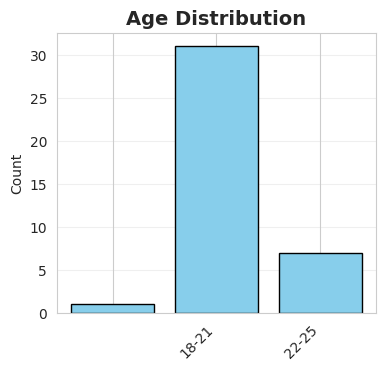

In [ ]:
# Plot 1: Age Distribution
if demo_cols['Age_Range']:
    ax1 = plt.subplot(2, 3, 1)
    # Ensure the column exists and is not duplicated before proceeding
    if demo_cols['Age_Range'] in df.columns:
        age_counts = df[demo_cols['Age_Range']].value_counts().sort_index()
        ax1.bar(range(len(age_counts)), age_counts.values, color='skyblue', edgecolor='black')
        ax1.set_xticks(range(len(age_counts)))
        ax1.set_xticklabels(age_counts.index, rotation=45, ha='right')
        ax1.set_title('Age Distribution', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Count')
        ax1.grid(axis='y', alpha=0.3)
        print(f"✅ Age Distribution plotted")
    else:
        print(f"❌ Error: Column '{demo_cols['Age_Range']}' not found after renaming.")

✅ Gender Distribution plotted


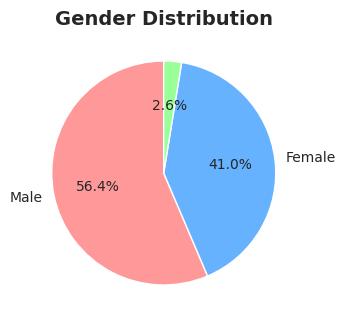

In [ ]:
# Plot 2: Gender Distribution
if demo_cols['Gender']:
    ax2 = plt.subplot(2, 3, 2)
    gender_counts = df[demo_cols['Gender']].value_counts()
    colors = ['#FF9999', '#66B2FF', '#99FF99'][:len(gender_counts)]
    ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    ax2.set_title('Gender Distribution', fontsize=14, fontweight='bold')
    print(f"✅ Gender Distribution plotted")

✅ Academic Stream Distribution plotted


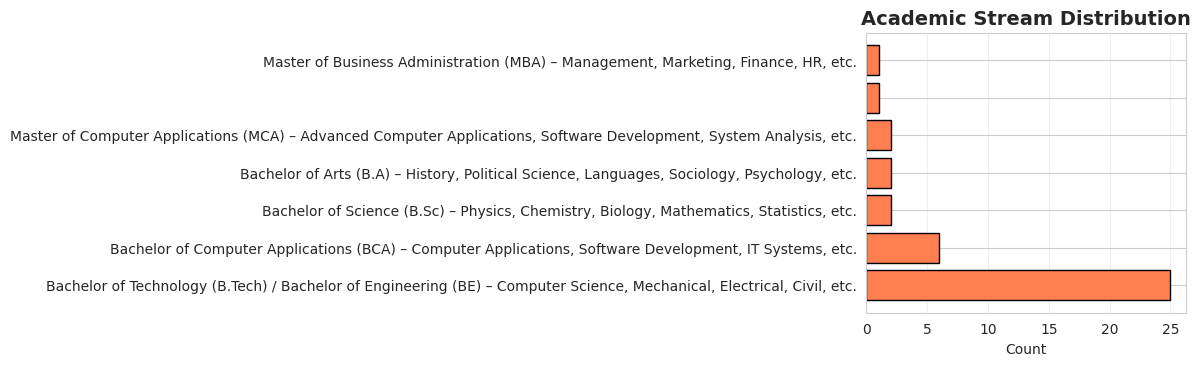

In [ ]:
if demo_cols['Academic_Stream']:
    ax3 = plt.subplot(2, 3, 3)
    stream_counts = df[demo_cols['Academic_Stream']].value_counts()
    ax3.barh(range(len(stream_counts)), stream_counts.values, color='coral', edgecolor='black')
    ax3.set_yticks(range(len(stream_counts)))
    ax3.set_yticklabels(stream_counts.index)
    ax3.set_title('Academic Stream Distribution', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Count')
    ax3.grid(axis='x', alpha=0.3)
    print(f"✅ Academic Stream Distribution plotted")

✅ Year of Study Distribution plotted


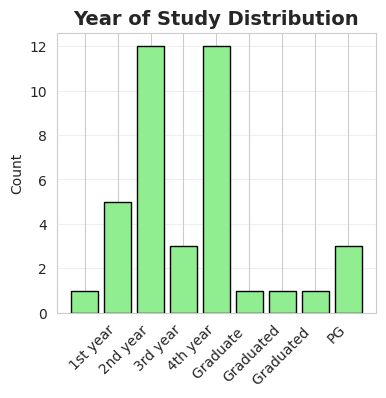

In [ ]:
# Plot 4: Year of Study Distribution
if demo_cols['Year_of_Study']:
    ax4 = plt.subplot(2, 3, 4)
    year_counts = df[demo_cols['Year_of_Study']].value_counts().sort_index()
    ax4.bar(range(len(year_counts)), year_counts.values, color='lightgreen', edgecolor='black')
    ax4.set_xticks(range(len(year_counts)))
    ax4.set_xticklabels(year_counts.index, rotation=45, ha='right')
    ax4.set_title('Year of Study Distribution', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Count')
    ax4.grid(axis='y', alpha=0.3)
    print(f"✅ Year of Study Distribution plotted")

In [ ]:
# Plot 5: Awareness by Stream (if scores exist)
if 'Awareness_Category' in df.columns and demo_cols['Academic_Stream']:
    ax5 = plt.subplot(2, 3, 5)
    stream_awareness = pd.crosstab(df[demo_cols['Academic_Stream']],
                                    df['Awareness_Category'])
    stream_awareness.plot(kind='bar', ax=ax5, color=['#e74c3c', '#f39c12', '#2ecc71'])
    ax5.set_title('Awareness Levels by Academic Stream', fontsize=14, fontweight='bold')
    ax5.set_xlabel('Academic Stream')
    ax5.set_ylabel('Count')
    ax5.legend(title='Awareness Level')
    ax5.tick_params(axis='x', rotation=45)
    ax5.grid(axis='y', alpha=0.3)

    print(f"✅ Awareness by Stream plotted")

✅ Response Timeline plotted


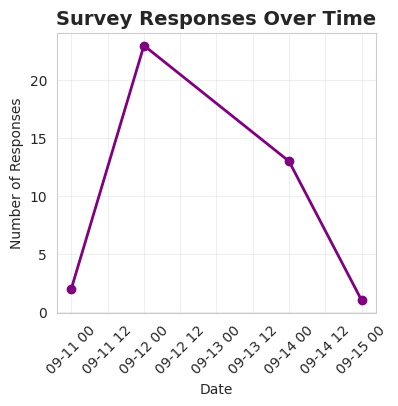

In [ ]:
# Plot 6: Response Timeline (if Timestamp exists)
if 'Timestamp' in df.columns:
    ax6 = plt.subplot(2, 3, 6)
    df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
    daily_responses = df['Date'].value_counts().sort_index()
    ax6.plot(daily_responses.index, daily_responses.values, marker='o',
             linewidth=2, markersize=6, color='purple')
    ax6.set_title('Survey Responses Over Time', fontsize=14, fontweight='bold')
    ax6.set_xlabel('Date')
    ax6.set_ylabel('Number of Responses')
    ax6.tick_params(axis='x', rotation=45)
    ax6.grid(alpha=0.3)
    print(f"✅ Response Timeline plotted")

In [ ]:
plt.tight_layout()
plt.savefig('demographic_analysis.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: demographic_analysis.png")
plt.show()


✅ Saved: demographic_analysis.png


<Figure size 1400x800 with 0 Axes>

PRIVACY PARADOX ANALYSIS

In [ ]:
print("\n" + "="*70)
print("STEP 2: PRIVACY PARADOX ANALYSIS")
print("="*70)


STEP 2: PRIVACY PARADOX ANALYSIS


In [ ]:
# Check if we have both concern and behavior data
concern_cols = ['Data_Collection_Clarity', 'Targeted_Ads_Opinion']
behavior_cols = ['Privacy_Policy_Reading', 'App_Permissions_Review',
                 'Privacy_Settings_Review', 'Different_Passwords']

existing_concern = [c for c in concern_cols if c in df.columns]
existing_behavior = [c for c in behavior_cols if c in df.columns]

In [ ]:
if len(existing_concern) > 0 and len(existing_behavior) > 0:
    print("\n📊 Creating Privacy Concern Score...")

    # Simple concern score (customize based on your response options)
    df['Privacy_Concern_Score'] = 0

    if 'Data_Collection_Clarity' in df.columns:
        # "No" means more concerned (aware that they don't explain clearly)
        df['Privacy_Concern_Score'] += df['Data_Collection_Clarity'].apply(
            lambda x: 1 if 'No' in str(x) else 0
        )

    if 'Targeted_Ads_Opinion' in df.columns:
        # "No" means concerned about targeted ads
        df['Privacy_Concern_Score'] += df['Targeted_Ads_Opinion'].apply(
            lambda x: 1 if 'No' in str(x) else 0
        )

    print("✅ Privacy Concern Score calculated")

    # If we already have Privacy_Awareness_Score from earlier scoring
    if 'Privacy_Awareness_Score' in df.columns:
        # Create scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Privacy_Concern_Score'], df['Privacy_Awareness_Score'],
                   alpha=0.6, s=100, c='purple')
        plt.xlabel('Privacy Concern Level', fontsize=12)
        plt.ylabel('Privacy Protection Behavior Score', fontsize=12)
        plt.title('Privacy Paradox: Concern vs Action', fontsize=14, fontweight='bold')

        # Add trend line
        z = np.polyfit(df['Privacy_Concern_Score'], df['Privacy_Awareness_Score'], 1)
        p = np.poly1d(z)
        plt.plot(df['Privacy_Concern_Score'], p(df['Privacy_Concern_Score']),
                "r--", linewidth=2, label='Trend line')

        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig('privacy_paradox.png', dpi=300, bbox_inches='tight')
        print("✅ Saved: privacy_paradox.png")
        plt.show()

        # Calculate correlation
        corr = df[['Privacy_Concern_Score', 'Privacy_Awareness_Score']].corr().iloc[0,1]
        print(f"\n📊 Correlation between concern and behavior: {corr:.3f}")

        if corr < 0.5:
            print("⚠️  PRIVACY PARADOX DETECTED: Low correlation suggests people are concerned but don't take protective action!")

else:
    print("⚠️  Insufficient data for privacy paradox analysis")


📊 Creating Privacy Concern Score...
✅ Privacy Concern Score calculated


AI TRUST COMPARISON (High-Stakes vs Low-Stakes)

In [ ]:
print("\n" + "="*70)
print("STEP 3: AI TRUST ANALYSIS (High-Stakes vs Low-Stakes)")
print("="*70)


STEP 3: AI TRUST ANALYSIS (High-Stakes vs Low-Stakes)


✅ Saved: ai_trust_comparison.png


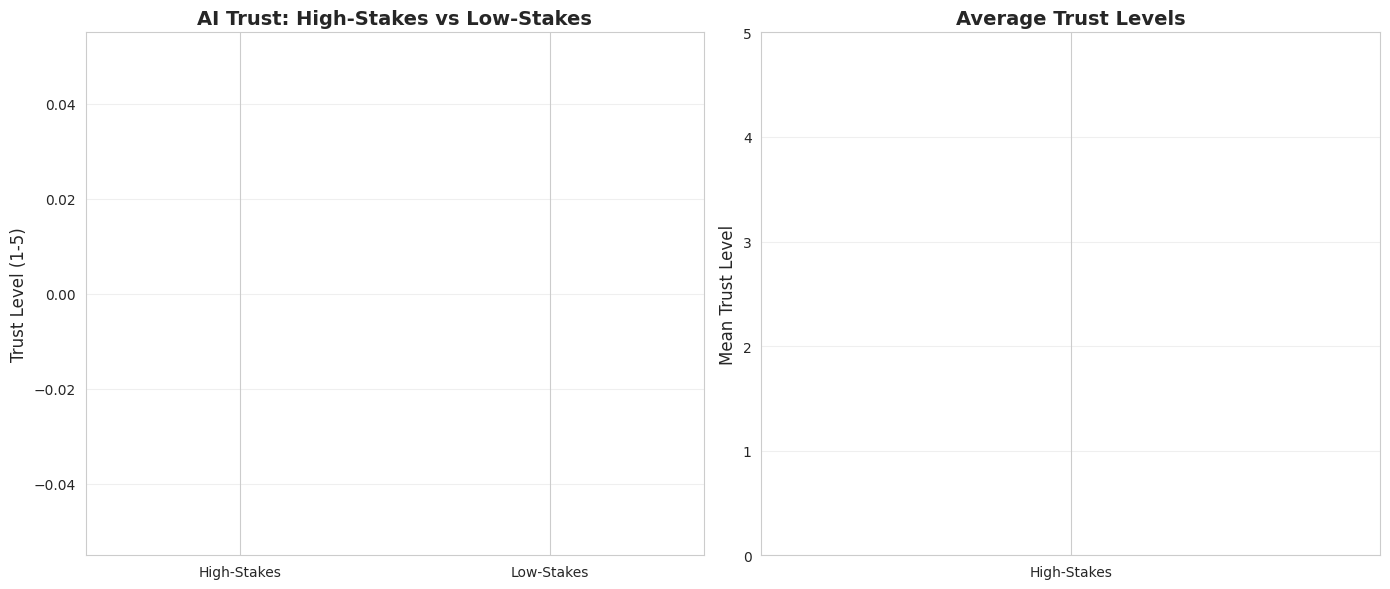


📊 Paired t-test results:
   Mean trust (High-Stakes): nan
   Mean trust (Low-Stakes): nan
   t-statistic: nan
   p-value: nan
   ⚠️  No significant difference detected


In [ ]:
if 'Trust_AI_Exam_Proctoring' in df.columns and 'Trust_AI_Music' in df.columns:

    # Convert trust levels to numeric (customize based on your scale)
    trust_mapping = {
        'Not at all': 1,
        'Slightly': 2,
        'Somewhat': 3,
        'Very much': 4,
        'Completely': 5,
        # Add more mappings based on your actual response options
    }

    df['Trust_Exam_Numeric'] = df['Trust_AI_Exam_Proctoring'].map(trust_mapping)
    df['Trust_Music_Numeric'] = df['Trust_AI_Music'].map(trust_mapping)

    # Create comparison visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Box plot comparison
    trust_data = pd.DataFrame({
        'High-Stakes\n(Exam Proctoring)': df['Trust_Exam_Numeric'].dropna(),
        'Low-Stakes\n(Music Recommendation)': df['Trust_Music_Numeric'].dropna()
    })

    ax1.boxplot([trust_data.iloc[:, 0], trust_data.iloc[:, 1]],
                labels=['High-Stakes', 'Low-Stakes'])
    ax1.set_ylabel('Trust Level (1-5)', fontsize=12)
    ax1.set_title('AI Trust: High-Stakes vs Low-Stakes', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)

    # Bar plot of means
    means = trust_data.mean()
    ax2.bar(['High-Stakes', 'Low-Stakes'], means.values,
           color=['#e74c3c', '#3498db'], edgecolor='black')
    ax2.set_ylabel('Mean Trust Level', fontsize=12)
    ax2.set_title('Average Trust Levels', fontsize=14, fontweight='bold')
    ax2.set_ylim(0, 5)
    ax2.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(means.values):
        ax2.text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.savefig('ai_trust_comparison.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: ai_trust_comparison.png")
    plt.show()

    # Statistical test
    from scipy.stats import ttest_rel
    t_stat, p_value = ttest_rel(df['Trust_Exam_Numeric'].dropna(),
                                 df['Trust_Music_Numeric'].dropna())

    print(f"\n📊 Paired t-test results:")
    print(f"   Mean trust (High-Stakes): {df['Trust_Exam_Numeric'].mean():.2f}")
    print(f"   Mean trust (Low-Stakes): {df['Trust_Music_Numeric'].mean():.2f}")
    print(f"   t-statistic: {t_stat:.3f}")
    print(f"   p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("   ✅ SIGNIFICANT DIFFERENCE: Students trust AI differently for different applications!")
    else:
        print("   ⚠️  No significant difference detected")

else:
    print("⚠️  AI trust questions not found in data")